In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Monty Hall Problem

Problem Description: Suppose you’re on a game show, and you’re given the choice of three doors: Behind one
door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what’s behind the
doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?"
Is it to your advantage to switch your choice? 

**A)** What do you think? Is it better to switch to the third door, or remain with the current selection? Will it make any difference at all? Why do you think so? (This question won't be graded based on the correctness of the answer. Just give a prediction!)

Answer: It is better to switch

**B)** Write a function in python named MontyHallProblem emulating the Monty Hall problem. Follow the
steps below:
1. Emulate the doors: Create three doors, and assign a big prize to one of them randomly.
2. Emulate the contestant: Pick one of the doors randomly.
3. Reveal what’s behind one of the two remaining doors: If one of the doors is the prize, remove the non-prize one.
If both are non-prize, remove one of them randomly.
4. Moment of the final choice: The contestant keeps the current selection with a probability α and switches to the
alternative door with a probability 1 − α. The parameter α is given to the function as an input.
5. Return whether the contestant won: True or False.

In [0]:
def MontyHallExperiment(alpha=0.5):
    doors = [1, 2, 3]
    winner = np.random.choice(doors)
    choice = np.random.choice(doors)
    switch = np.random.random() >= alpha
    # if choice is winner and not switch, or choice is not winner and switch
    return (choice == winner) != switch 
    pass

**C)** For each $\alpha= 0, 0.1, 0.2, \ldots, 1.0$ run the experiment for many times (such as 10000), and estimate the probability of winning as a function of $\alpha$. Plot the results. What is the probability of winning if you never switch? What's the probability of winnig if you always switch? How does the result compare to your prediction from A)?

In [0]:
num_trials = 10000
# range from 0.0 to 1.0
alphas = np.arange(0.0, 1.1, 0.1)

In [0]:
probabilities = []
for i in range(len(alphas)):
  probabilities.append(sum([MontyHallExperiment(alphas[i])for _ in range(num_trials)])/num_trials)

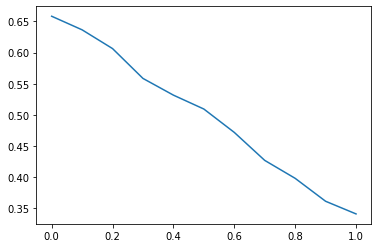

In [6]:
plt.plot(alphas, probabilities)

As this graph shows, when one always switches they have a much greater probability of winning (0.67) than if they never switch (0.33).

## 2.1 Conditional Die Rolling

First we toss a coin (biased in general with parameter α), if Heads appears, we roll a four-sided die. If Tails appears,
we roll an eight-sided die.

**A)** Write a function named ConditionalDieRoll that emulates this experiment. The function should take the
parameter α as input, and needs to output a tuple containing the results of coin toss and die rolling (For example:
("H"; 3) or ("T"; 7)).

In [0]:
def ConditionalDieRoll(alpha=0.5):
    coin_toss = np.random.random() >= alpha
    # lets say heads is true, tails is false
    if coin_toss:
      roll = np.random.choice([1,2,3,4])
      return ("H", roll)
    else:
      roll = np.random.choice([1,2,3,4,5,6,7,8])
      return ("T", roll)
    pass

**B)** For α = 0:5 (i.e. suppose the coin toss is fair), generate 10000 samples of the experiment above

In [0]:
samples = [ConditionalDieRoll(0.5) for _ in range(10000)]

**C)** Estimate the conditional probability $P(1|H)$. Of the 10000 experiments above, count the number
of times that Heads appeared for the coin. Let’s denote it by $n(H)$. Next, count the number of times that
Heads appeared for the coin and 1 appeared for the die. Let’s denote it by $n(H, 1)$. Calculate the fraction
$n(H, 1)/n(H)$. Compare to the theoretical value for $P(1|H)$

In [10]:
n_h = len([x for x in samples if x[0] == 'H'])
n_h_1 = len([x for x in samples if x[0] == 'H' and x[1] == 1])
p_1_h = n_h_1 / n_h
print("Probability of 1 given H: ", p_1_h)

Probability of 1 given H:  0.2545490119350421


This is about equal to the theoretical value of P(1|H) which is equal to P(1 and H) / P(H), which equals 1/4

**D)** Repeat part C for P(5|H), P(1|T), and P(5|T). Report the results

In [11]:
n_h_5 = len([x for x in samples if x[0] == 'H' and x[1] == 5])
p_5_h = n_h_5 / n_h
print("Probability of 5 given H: ", p_5_h)

Probability of 5 given H:  0.0


In [12]:
n_t = len([x for x in samples if x[0] == 'T'])
n_t_1 = len([x for x in samples if x[0] == 'T' and x[1] == 1])
p_1_t = n_t_1 / n_t
print("Probability of 1 given T: ", p_1_t)

Probability of 1 given T:  0.12517897320515442


In [13]:
n_t_5 = len([x for x in samples if x[0] == 'T' and x[1] == 5])
p_5_t = n_t_5 / n_t
print("Probability of 5 given T: ", p_5_t)

Probability of 5 given T:  0.1221108611167928


**E)** Repeat part C for P(H|5), P(T|5), P(T|1), and P(H|1). Report the result

In [14]:
n_5 = len([x for x in samples if x[1] == 5])
n_5_h = len([x for x in samples if x[1] == 5 and x[0] == 'H'])
p_h_5 = n_5_h / n_5
print("Probability of H given 5: ", p_h_5) 

Probability of H given 5:  0.0


In [15]:
n_5_t = len([x for x in samples if x[1] == 5 and x[0] == 'T'])
p_t_5 = n_5_t / n_5
print("Probability of T given 5: ", p_t_5)

Probability of T given 5:  1.0


In [16]:
n_1 = len([x for x in samples if x[1] == 1])
n_1_t = len([x for x in samples if x[1] == 1 and x[0] == 'T'])
p_t_1 = n_1_t / n_1
print("Probability of T given 1: ", p_t_1)

Probability of T given 1:  0.319916361735494


In [17]:
n_1_h = len([x for x in samples if x[1] == 1 and x[0] == 'H'])
p_h_1 = n_1_h / n_1
print("Probability of H given 1: ", p_h_1)

Probability of H given 1:  0.680083638264506


**F)** If you repeat parts B,C,D,E for $\alpha=0.75$, which probabilities do you expect to change, compared to $\alpha=0.5$? Now redo B,C,D,E for $\alpha=0.75$ and check that your results make sense.

I predict that P(H|5), P(T|5), P(5|H), P(5|T), P(1|T) and P(1|H) will be unchanged and that P(T|1) and P(H|1) will change.

In [18]:
samples = [ConditionalDieRoll(0.75) for _ in range(10000)]
n_h = len([x for x in samples if x[0] == 'H'])
n_h_1 = len([x for x in samples if x[0] == 'H' and x[1] == 1])
p_1_h = n_h_1 / n_h
print("Probability of 1 given H: ", p_1_h)
n_h_5 = len([x for x in samples if x[0] == 'H' and x[1] == 5])
p_5_h = n_h_5 / n_h
print("Probability of 5 given H: ", p_5_h)
n_t = len([x for x in samples if x[0] == 'T'])
n_t_1 = len([x for x in samples if x[0] == 'T' and x[1] == 1])
p_1_t = n_t_1 / n_t
print("Probability of 1 given T: ", p_1_t)
n_t_5 = len([x for x in samples if x[0] == 'T' and x[1] == 5])
p_5_t = n_t_5 / n_t
print("Probability of 5 given T: ", p_5_t)
n_5 = len([x for x in samples if x[1] == 5])
n_5_h = len([x for x in samples if x[1] == 5 and x[0] == 'H'])
p_h_5 = n_5_h / n_5
print("Probability of H given 5: ", p_h_5)
n_5_t = len([x for x in samples if x[1] == 5 and x[0] == 'T'])
p_t_5 = n_5_t / n_5
print("Probability of T given 5: ", p_t_5)
n_1 = len([x for x in samples if x[1] == 1])
n_1_t = len([x for x in samples if x[1] == 1 and x[0] == 'T'])
p_t_1 = n_1_t / n_1
print("Probability of T given 1: ", p_t_1)
n_1_h = len([x for x in samples if x[1] == 1 and x[0] == 'H'])
p_h_1 = n_1_h / n_1
print("Probability of H given 1: ", p_h_1)

Probability of 1 given H:  0.25020441537203597
Probability of 5 given H:  0.0
Probability of 1 given T:  0.12020121789780248
Probability of 5 given T:  0.1290706910246227
Probability of H given 5:  0.0
Probability of T given 5:  1.0
Probability of T given 1:  0.5973684210526315
Probability of H given 1:  0.4026315789473684


## 2.2 Pregnancy Test

A medical lab has developed a new pregnancy test. If the test is applied to a pregnant (denoted by "P") case, it
will return positive results (denoted by +) with probability α. If the test is applied to a non-pregnant case (denoted
by "N") it will return negative results (denoted by -) with probability β. Suppose that of all the study population,
a fraction γ are pregnant and the rest are non-pregnant.

**A)** Find the theoretical expressions of P(+|P), P(−|P), P(+|N), and P(−|N) in terms of α, β, and γ.

Answer (Use Latex formatting):

<div align="center">

$P(+|P) = \alpha$

$P(-|P) = 1 - \alpha$

$P(+|N) = 1 - \beta$

$P(-|N) = \beta$
</div>

**B)** Find the theoretical expressions of P(P|+), P(P|−), P(N|−), and P(N|−) in terms of α, β, and γ.

Answer:

$$P(P|+) = \frac{\gamma \alpha}{\gamma \alpha + (1-\gamma)(1-\beta)}$$

$$P(P|-) = \frac{\gamma (1-\alpha)}{\gamma (1-\alpha) + (1-\gamma)\beta}$$

$$P(N|+) = \frac{(1-\gamma)(1-\beta)}{\gamma \alpha + (1-\gamma)(1-\beta)}$$

$$P(N|-) = \frac{(1-\gamma)\beta}{\gamma \alpha + (1-\gamma)\beta}$$

**C)** Download and read the file "PregnancyData.csv", containing the pregnancy test data for a population of size 10000. The first column demonstrates the index of each case, the second column shows the Pregnancy/Nonpregnancy status, and the third column shows the result of the test on each subject.

In [0]:
import pandas as pd

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_to_data = "./drive/My Drive/EE 399/Lab HW2/PregnancyData.csv"
df = pd.read_csv(path_to_data, delimiter = ',')

In [26]:
df.columns

Index(['Subject_ID', 'Preg/NonPreg', 'Test_result'], dtype='object')

**D)** Estimate the parameters α, β and γ from the data. Explain how you do it

To find $\alpha$, we will count the number of pregnant persons in the sample space. We will then count the number of positive pregnant persons. Then alpha will be the ratio of positive pregnant persons to pregnant persons.

$\beta$ will be found by computing the ratio of persons who are not pregant and negative to the persons who are not pregnant.

$\gamma$ is simply the ratio of pregnant persons to total persons.

In [28]:
n = len(df)
P = df[df['Preg/NonPreg'] == 'P']
n_P = len(P)
gamma = n_P / n
print("gamma: ", gamma)

gamma:  0.0473


In [31]:
P_plus = P[P['Test_result'] == '+']
n_P_plus = len(P_plus)
alpha = n_P_plus / n_P
print("alpha: ", alpha)

alpha:  0.9154334038054969


In [32]:
N = df[df['Preg/NonPreg'] == 'N']
n_N = len(N)
N_minus = N[N['Test_result'] == '-']
n_N_minus = len(N_minus)
beta = n_N_minus / n_N
print("beta: ", beta)

beta:  0.7976277946887793


**E)** Substitute your estimates of part D in the formulas of parts A and B, and calculate the numerical values of
each of the eight conditional probabilities.

In [0]:
P_plus_given_P = alpha
P_minus_given_P = 1-alpha
P_plus_given_N = 1-beta
P_minus_given_N = beta

P_P_given_plus = gamma*alpha / (gamma*alpha + (1-gamma)*(1-beta))
P_P_given_minus = gamma*(1-alpha) / (gamma*(1-alpha) + (1-gamma)*beta)
P_N_given_plus = (1-gamma)*(1-beta) / (gamma*alpha + (1-gamma)*(1-beta))
P_N_given_minus = (1-gamma)*beta / (gamma*(1-alpha) + (1-gamma)*beta)

**F)** Now directly estimate the conditional probabilities of parts A and B from the data (Hint: Follow the logic in
section 2.1 part C). Compare the results to the numerical results of part E

In [0]:
plus = df[df['Test_result'] == '+']
n_plus = len(plus)

plus_P = plus[plus['Preg/NonPreg'] == 'P']
n_plus_P = len(plus_P)

plus_N = plus[plus['Preg/NonPreg'] == 'N']
n_plus_N = len(plus_N)

minus = df[df['Test_result'] == '-']
n_minus = len(minus)

minus_P = minus[minus['Preg/NonPreg'] == 'P']
n_minus_P = len(minus_P)

minus_N = minus[minus['Preg/NonPreg'] == 'N']
n_minus_N = len(minus_N)

In [0]:
E_plus_given_P = n_plus_P / n_P
E_minus_given_P = n_minus_P / n_P
E_plus_given_N = n_plus_N / n_N
E_minus_given_N = n_minus_N / n_N

E_P_given_plus = n_plus_P / n_plus
E_P_given_minus = n_minus_P / n_minus
E_N_given_plus = n_plus_N / n_plus
E_N_given_minus = n_minus_N / n_minus

In [51]:
print("Comparison of results calculated using") 
print("\tA) the formula, and B) directly from the data")
print("P(+|P): A) %10f \tB) %10f"% (P_plus_given_P, E_plus_given_P))
print("P(-|P): A) %10f \tB) %10f"% (P_minus_given_P, E_minus_given_P))
print("P(+|N): A) %10f \tB) %10f"% (P_plus_given_N, E_plus_given_N))
print("P(-|N): A) %10f \tB) %10f"% (P_minus_given_N, E_minus_given_N))
print("P(P|+): A) %10f \tB) %10f"% (P_P_given_plus, E_P_given_plus))
print("P(P|-): A) %10f \tB) %10f"% (P_P_given_minus, E_P_given_minus))
print("P(N|+): A) %10f \tB) %10f"% (P_N_given_plus, E_N_given_plus))
print("P(N|-): A) %10f \tB) %10f"% (P_N_given_minus,  E_N_given_minus))

Comparison of results calculated using
	A) the formula, and B) directly from the data
P(+|P): A)   0.915433 	B)   0.915433
P(-|P): A)   0.084567 	B)   0.084567
P(+|N): A)   0.202372 	B)   0.202372
P(-|N): A)   0.797628 	B)   0.797628
P(P|+): A)   0.183397 	B)   0.183397
P(P|-): A)   0.005236 	B)   0.005236
P(N|+): A)   0.816603 	B)   0.816603
P(N|-): A)   0.994764 	B)   0.994764
